In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

C:\Users\lucaa\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Importando o data base

names = ['itamar', 'fhc1', 'fhc2', 'lula1', 'lula2', 'dilma', 'dil_temer']

dates_names = {
    'itamar_start':'1993-04-27',
    'itamar_end':'1995-01-02',  
              
    'fhc1_start':'1995-01-02',
    'fhc1_end':'1999-01-04',
    
    'fhc2_start':'1999-01-04',
    'fhc2_end':'2003-01-02',
    
    'lula1_start':'2003-01-02',
    'lula1_end':'2007-01-02',
    
    'lula2_start':'2007-01-02',
    'lula2_end':'2011-01-03',
    
    'dilma_start':'2011-01-03',
    'dilma_end':'2015-01-02',

    'dil_temer_start':'2015-01-02',
    'dil_temer_end':'2018-12-28'
              }

data = pd.DataFrame()

for n in names:
    data['Valores'] = wb.DataReader('^BVSP', data_source='yahoo', start=dates_names['itamar_start'], end=dates_names['dil_temer_end'])['Adj Close']

In [3]:
bolsonaro_start = '2018-12-28'

data_bolsonaro = pd.DataFrame()

data_bolsonaro = wb.DataReader('^BVSP', data_source='yahoo', start=bolsonaro_start)['Adj Close']

In [4]:
bolsonaro = []

for i in range(1,len(data_bolsonaro)):
    bolsonaro.append(data_bolsonaro.iloc[i]/data_bolsonaro.iloc[0])

In [5]:
new_index = []

for i in range(len(data.index)):
    new_index.append(i)

data['Label'] = new_index

In [6]:
x=[[]]

for n in names:
    index_start = str(n)+'_start'
    index_end = str(n)+'_end'
    temp_index = data['Label'][dates_names[index_start]]
    y=[]
    while(temp_index != data['Label'][dates_names[index_end]]):
        y.append(data['Valores'][temp_index])
        temp_index=temp_index+1
    x.append(y)
    
x.append(bolsonaro)

In [7]:
for i in range(1,len(x)):
    #plt.plot(x[i])
    if(i==(len(x)-1)):
        #plt.title('bolsonaro')
        print('bolsonaro')
        print(str(round((x[i][-1]/x[i][0]-1)*100,2))+'%')
    else:
        #plt.title(names[i-1])
        print(names[i-1])
        print(str(round((x[i][-1]/x[i][0]-1)*100,2))+'%')
    #plt.show()

itamar
17671.02%
fhc1
57.73%
fhc2
62.32%
lula1
283.3%
lula2
52.71%
dilma
-28.52%
dil_temer
76.16%
bolsonaro
4.01%


In [8]:
w=[[]]

for i in range(1,len(x)):
    t=[]
    for l in range(len(x[i])):
        t.append(x[i][l]/x[i][0])
    w.append(t)

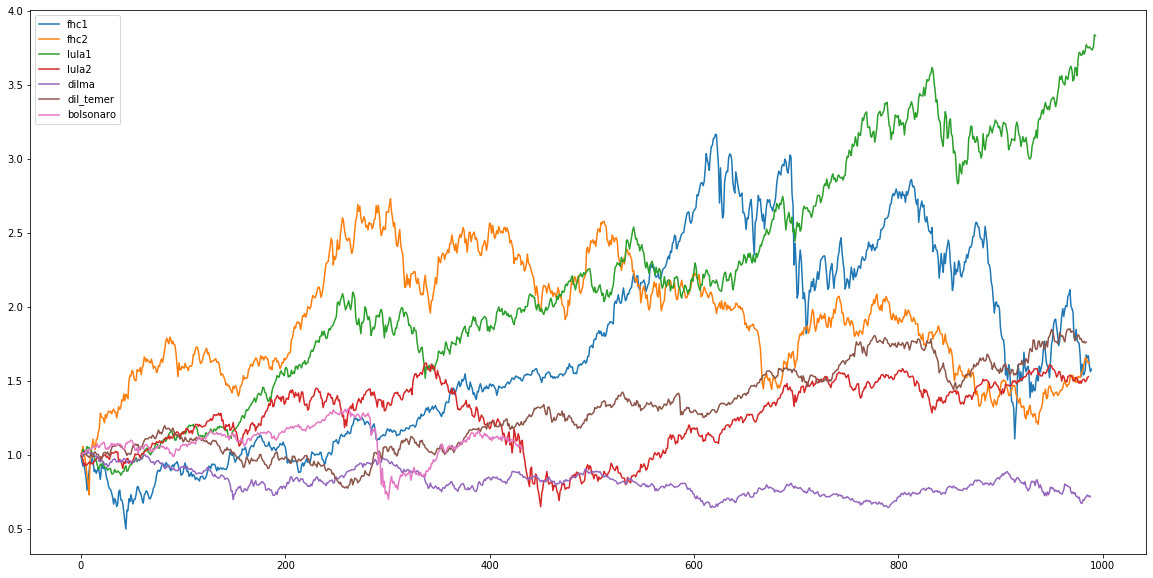

In [9]:
plt.figure(figsize=(20,10))

for i in range(2,len(w)):
    if(i!=len(w)-1):
        plt.plot(w[i],label=str(names[i-1]))
    else:
        plt.plot(w[i],label='bolsonaro')
    plt.legend()
    
plt.show()